In [2]:
%cd ..

/Users/lukakarginov/Documents/Dar Lab/scnnoise


In [3]:
from scnnoise import _scnnoise
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np
import pandas as pd
import src.scnnoise.CellType as ct
import src.scnnoise.LTSim as lt

In [4]:
### Creating 100 Gene spec files for simulator

genes = [['Gene '+str(i),'two-state', 'gene on', 2, 'gene off', 0, 'mRNA', 0, 'protein', 0] for i in range(100)]
reactions = [[gene[0],'two-state',0,0,'gene on',0.0282,'gene off',0.609,'transcription',7.11,'mRNA decay',0.1299,'translation',0.3299,'protein decay',0.00245] for gene in genes]
pd.DataFrame(reactions).to_csv('data/toy_data/100GenesSimpleRxns.csv', header = False, index = False)
pd.DataFrame(genes).to_csv('data/toy_data/100GenesSimple.csv', header = False, index = False)



In [5]:
### Testing cellType creation
    #small changes
    #samples.csv
cell_type_csv = 'data/toy_data/100GenesSimpleCellTypes.csv'
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,5):
    samp = [7.11*(np.random.random()+.5) if r else 7.11 for r in np.random.random(100)<.3]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.1299,0.3299,0.00245,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)

c4 = ct.CellType(4,cell_type_csv,[],'count.csv', 'samples.csv') #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4], 'count.csv', 'samples.csv') 
c2 = ct.CellType(2,cell_type_csv,[], 'count.csv', 'samples.csv') 
c1 = ct.CellType(1,cell_type_csv,[c2,c3], 'count.csv', 'samples.csv') 
 
c1.children[1].children[0].lineageName #should output 4

4

In [5]:
### Testing cellType creation
#this time we try changing 50% of all genes in each cell type mutliplying by:
    #1-2 for celltype 2
    #2-3 for celltype 3
    #3-4 for celltype 4
    
    #samples2.csv

cell_type_csv = 'data/toy_data/100GenesSimpleCellTypestest2.csv'
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,5):
    samp = [7.11*(np.random.random()+(celltype-1)) if (r and celltype!=1) else 7.11 for r in np.random.random(100)<.5]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.1299,0.3299,0.00245,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)

c4 = ct.CellType(4,cell_type_csv,[],'count.csv', 'samples.csv') #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4], 'count.csv', 'samples.csv') 
c2 = ct.CellType(2,cell_type_csv,[], 'count.csv', 'samples.csv') 
c1 = ct.CellType(1,cell_type_csv,[c2,c3], 'count.csv', 'samples.csv') 
 
c1.children[1].children[0].lineageName #should output 4

4

In [4]:
### Testing cellType creation w. mRNA
#this time we try changing 100% of all genes in each cell type mutliplying by:
    #2-4 for celltype 2
    #4-6 for celltype 3
    #6-8 for celltype 4
    
    #samples2.csv

cell_type_csv = 'data/toy_data/100GenesSimpleCellTypestest3.csv'
"""
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,5):
    samp = [7.11*2*(np.random.random()+(celltype-1)) if (r and celltype!=1) else 7.11 for r in np.random.random(100)<1]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.1299,0.3299,0.00245,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)
"""

c4 = ct.CellType(4,cell_type_csv,[],'count.csv', 'samplesmRNA.csv') #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4], 'count.csv', 'samplesmRNA.csv') 
c2 = ct.CellType(2,cell_type_csv,[], 'count.csv', 'samplesmRNA.csv') 
c1 = ct.CellType(1,cell_type_csv,[c2,c3], 'count.csv', 'samplesmRNA.csv') 
 
c1.children[1].children[0].lineageName #should output 4

4

In [4]:
### Testing cellType creation w. Protein
#this time we try changing 100% of all genes in each cell type mutliplying by:
    #2-4 for celltype 2
    #4-6 for celltype 3
    #6-8 for celltype 4
    
    #samples2.csv

cell_type_csv = 'data/toy_data/100GenesSimpleCellTypestest3.csv'
"""
celltypes = [['Gene','gene on','gene off','transcription','mRNA decay','translation','protein decay','Cell Type']]
for celltype in range(1,5):
    samp = [7.11*2*(np.random.random()+(celltype-1)) if (r and celltype!=1) else 7.11 for r in np.random.random(100)<1]
    for idx, gene in enumerate(genes):
        celltypes.append([gene[0], 0.0282,0.609,samp[idx],0.1299,0.3299,0.00245,celltype])
pd.DataFrame(celltypes).to_csv(cell_type_csv, header = False, index = False)
"""

c4 = ct.CellType(4,cell_type_csv,[],'count.csv', 'samplesProt.csv') #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4], 'count.csv', 'samplesProt.csv') 
c2 = ct.CellType(2,cell_type_csv,[], 'count.csv', 'samplesProt.csv') 
c1 = ct.CellType(1,cell_type_csv,[c2,c3], 'count.csv', 'samplesProt.csv') 
 
c1.children[1].children[0].lineageName #should output 4

4

In [5]:
sim1  = lt.LTSim(c1, 100, gene_csv='data/toy_data/100GenesSimpleRxns.csv', mol_csv ='data/toy_data/100GenesSimple.csv',count_csv = 'count.csv',sample_csv = 'samplesProt.csv')

In [6]:
a = sim1.sim_LT(100)

1T
1
2T
2
3T
3
4T
4


In [7]:
data = pd.read_csv('samplesProt.csv', header = None)

In [9]:
import umap
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [10]:
scaled_data = StandardScaler().fit_transform(data[data.columns[1:-1]])
reducer = umap.UMAP()
embedding = reducer.fit_transform(scaled_data)

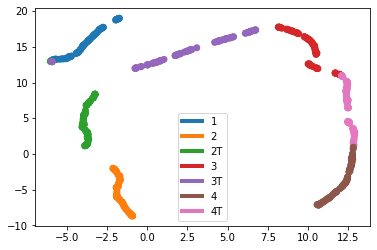

In [11]:
#UMAP of protein from simulator
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=4) for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)

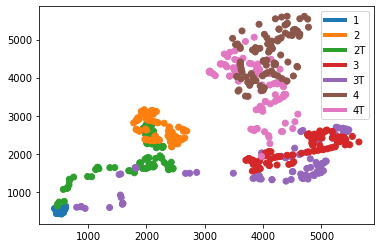

In [12]:
#scatter of 2 genes
plt.scatter(
    data[data.columns[1]],
     data[data.columns[2]],
    c=[sns.color_palette()[x] for x in data[data.columns[-1]].map({"1":0, "2":1, "2T":2,"3":3 ,"3T":4, "4":5, "4T":6 })])
custom_lines = [Line2D([0], [0], color=sns.color_palette()[x], lw=4) for x in range(7)]
                
sortedct = list(set(data[data.columns[-1]]))
sortedct.sort()
plt.legend(custom_lines, sortedct)

In [13]:
data = pd.read_csv('samples2.csv', header = None)

In [47]:
a = []
b= []
for i in range(1,5):
    a.append([])
    b.append([])
    a[i-1] = np.mean(data[data.columns[1:-1]][data[data.columns[-1]] == str(i)])
    b[i-1] = np.std(data[data.columns[1:-1]][data[data.columns[-1]] == str(i)])

In [79]:
x= []
models = []
for i in range(4):
    x.append([[samp] for samp in a[i]])
    models.append(LinearRegression())
    models[i].fit(x[i], np.divide(a[i],b[i])**2)
    

SpearmanrResult(correlation=0.4605617280706627, pvalue=1.4245482209910784e-06)
SpearmanrResult(correlation=0.23562026888875592, pvalue=0.018279474656492472)
SpearmanrResult(correlation=0.4361035353030121, pvalue=5.7494481042514625e-06)
SpearmanrResult(correlation=0.5212436881022203, pvalue=2.6950575259961748e-08)


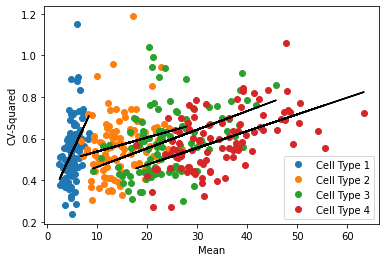

In [86]:
for i in range(4):
    plt.plot(a[i],np.divide(a[i],b[i])**2,'o')
    print(spearmanr(a[i],np.divide(a[i],b[i])**2))
   
for i in range(4):
    plt.plot(x[i],models[i].predict(x[i]),'k')

plt.xlabel('Mean')
plt.ylabel('CV-Squared')
plt.legend(['Cell Type 1', 'Cell Type 2', 'Cell Type 3', 'Cell Type 4'])

In [3]:
data = pd.read_csv('samplesProt.csv', header = None)

In [4]:
a = []
b= []
for i in range(1,5):
    a.append([])
    b.append([])
    a[i-1] = np.mean(data[data.columns[1:-1]][data[data.columns[-1]] == str(i)])
    b[i-1] = np.std(data[data.columns[1:-1]][data[data.columns[-1]] == str(i)])

In [7]:
x= []
models = []
for i in range(4):
    x.append([[samp] for samp in a[i]])
    models.append(LinearRegression())
    models[i].fit(x[i], np.divide(a[i],b[i])**2)
    

SpearmanrResult(correlation=0.0886168616861686, pvalue=0.38062034561196767)
SpearmanrResult(correlation=0.12988898889888986, pvalue=0.19773771949674016)
SpearmanrResult(correlation=0.09903390339033903, pvalue=0.3269378227291373)
SpearmanrResult(correlation=-0.06651065106510651, pvalue=0.5108767952161286)


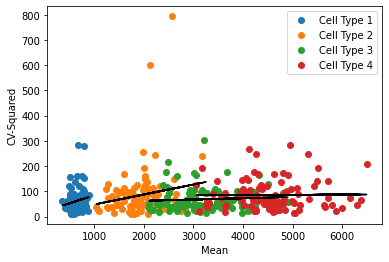

In [8]:
for i in range(4):
    plt.plot(a[i],np.divide(a[i],b[i])**2,'o')
    print(spearmanr(a[i],np.divide(a[i],b[i])**2))
   
for i in range(4):
    plt.plot(x[i],models[i].predict(x[i]),'k')

plt.xlabel('Mean')
plt.ylabel('CV-Squared')
plt.legend(['Cell Type 1', 'Cell Type 2', 'Cell Type 3', 'Cell Type 4'])

In [55]:
np.divide(a[0],b[0])**2


1      0.690856
2      0.459916
3      0.639280
4      0.399648
5      0.498267
         ...   
96     0.452085
97     0.528023
98     0.507320
99     0.542936
100    0.741570
Length: 100, dtype: float64

In [6]:
from sklearn.linear_model import LinearRegression
from scipy.stats import spearmanr

In [75]:
lm = LinearRegression()
lm.fit(np.array(x),np.array(np.divide(a[1],b[1])**2))
print(lm.intercept_)
print(lm.coef_)

0.4702619243103423
[0.00674412]


In [4]:
### Testing cellType creation
cell_type_csv = 'data/toy_data/two_gene_cell_types.csv'
c4 = ct.CellType(4,cell_type_csv,[],'count.csv', 'samples2GeneProt.csv', ) #placeholder reaction rates
c3 = ct.CellType(3,cell_type_csv,[c4], 'count.csv', 'samples2GeneProt.csv',) 
c2 = ct.CellType(2,cell_type_csv,[], 'count.csv', 'samples2GeneProt.csv', ) 
c1 = ct.CellType(1,cell_type_csv,[c2,c3], 'count.csv', 'samples2GeneProt.csv', ) 
 
c1.children[1].children[0].lineageName #should output 4
c4.rxn_rates


{'A': {'gene on': 0.2256,
  'gene off': 0.609,
  'transcription': 2.11,
  'mRNA decay': 0.1299,
  'translation': 0.3299,
  'protein decay': 0.00245},
 'B': {'gene on': 0.2256,
  'gene off': 0.609,
  'transcription': 2.11,
  'mRNA decay': 0.1299,
  'translation': 0.3299,
  'protein decay': 0.00245}}

In [5]:
sim1  = lt.LTSim(c1, 2, gene_csv='data/toy_data/two_gene_cell_cycle.csv', mol_csv ='data/toy_data/two_gene_cell_cycle_molecule_count.csv',count_csv = 'count.csv',sample_csv = 'samples2GeneProt.csv', molecule = "protein")

In [6]:
a = sim1.sim_LT(100)

NameError: name 'molecule' is not defined

In [6]:
df = pd.read_csv('samples.csv', index_col = 0, header = None)
df

,1,2,3
0,,,
1385,233,154,1
2488,222,148,1
1921,244,154,1
2481,225,149,1
230,169,132,1
...,...,...,...
13222,1109,1334,4
6688,1099,1148,4
5895,1158,1172,4


Text(0.5, 0, 'Gene A Protein')

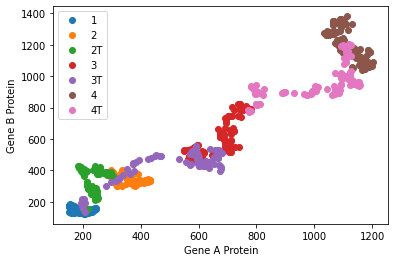

In [7]:
celltypes = df.groupby(df.columns[2])
for name, celltype in celltypes:
    plt.plot( celltype[df.columns[0]], celltype[df.columns[1]], 'o', label = name)
plt.legend()
plt.ylabel('Gene B Protein')
plt.xlabel('Gene A Protein')

In [9]:
simulator = _scnnoise.gillespieSDMnoCellCycle(sim1.num_genes, sim1.gene_csv, sim1.mol_csv, sim1.count_csv, False, "dummy", 1000)

In [41]:
simulator.set_simulation_params(10000, True)
simulator.swap_rxn_rates({'A': {'gene on': 0.2256,
  'gene off': 0.609,
  'transcription': 7.11,
  'mRNA decay': 0.1299,
  'translation': 0.3299,
  'protein decay': 0.00245}})
simulator.simulate(list(np.random.randint(low = 1, high = 1000000, size = 4)))

(array([10921., 40722., 63403., 70269., 41734., 23022., 11840.,  2928.,
         1444.,   463.]),
 array([ 1. , 10.3, 19.6, 28.9, 38.2, 47.5, 56.8, 66.1, 75.4, 84.7, 94. ]),
 <BarContainer object of 10 artists>)

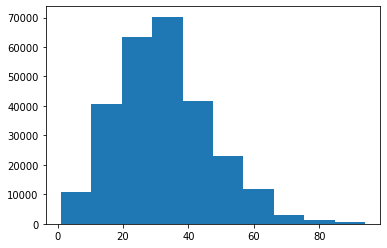

In [42]:
df = pd.read_csv('count.csv')
plt.hist(df['A:mRNA'])

In [28]:
mol2 = df2[df2.columns[1:-1]].values

NameError: name 'df2' is not defined

In [10]:
time = np.cumsum(df[df.columns[0]]).values
mol = df[df.columns[1:-1]].values

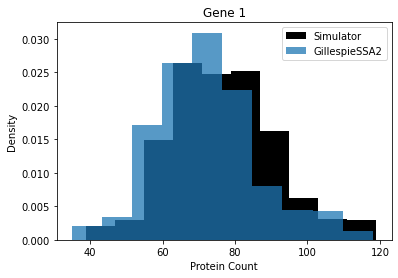

In [29]:
plt.hist(mol.T[3][1000:], density = True, color = 'k')
plt.hist(df3.values.T[2][1000:], alpha = .75, density = True)
plt.ylabel('Density')
plt.xlabel('Protein Count')
plt.title('Gene 1')
plt.legend(['Simulator', 'GillespieSSA2'])
plt.savefig('comparSim1.pdf')

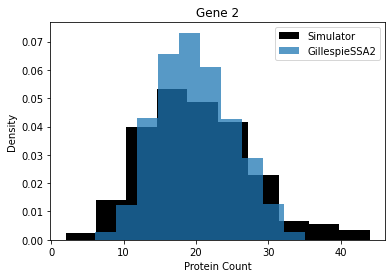

In [30]:
plt.hist(mol.T[7][1000:], density = True, color = 'k')
plt.hist(df3.values.T[3][1000:], alpha = .75, density = True)
plt.ylabel('Density')
plt.xlabel('Protein Count')
plt.title('Gene 2')
plt.legend(['Simulator', 'GillespieSSA2'])
plt.savefig('comparSim2.pdf')

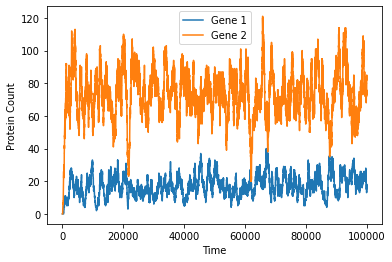

In [107]:
plt.plot(time, mol.T[7])
plt.plot(time, mol.T[3])
plt.ylabel('Protein Count')
plt.xlabel('Time')
plt.legend(['Gene 1', 'Gene 2'])
plt.savefig('prot.pdf')

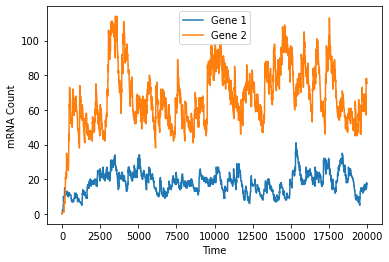

In [60]:
plt.plot(time, mol.T[6])
plt.plot(time, mol.T[2])
plt.ylabel('mRNA Count')
plt.xlabel('Time')
plt.legend(['Gene 1', 'Gene 2'])
plt.savefig('mRNA.pdf')

Text(0, 0.5, 'Protein Molecules')

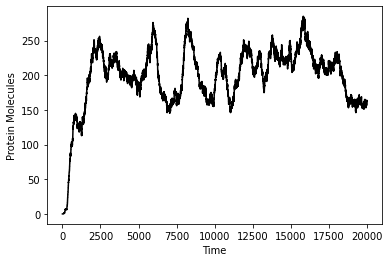

In [29]:
plt.plot(time, mol.T[7],'k')
#for samp in range(6):
    #plt.axvline(samp*4000,color = 'r')
plt.xlabel('Time')
plt.ylabel('Protein Molecules')
#plt.savefig('steady_state_detection.pdf')

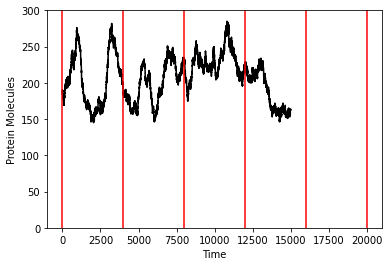

In [14]:
plt.plot(time[time>5000]-5000, mol.T[7][time>5000],'k')
for samp in range(6):
    plt.axvline(samp*4000,color = 'r')
plt.xlabel('Time')
plt.ylabel('Protein Molecules')
plt.ylim(0,300)
plt.savefig('steady_state_detection ss.pdf')

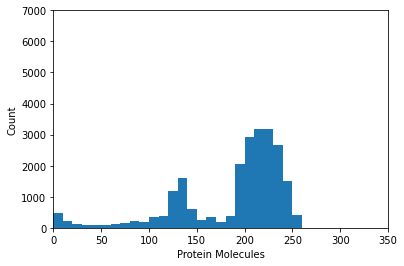

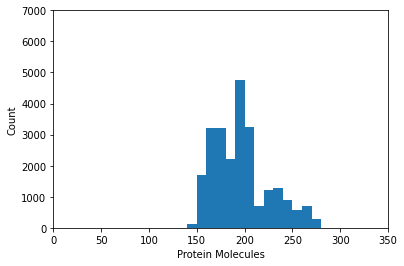

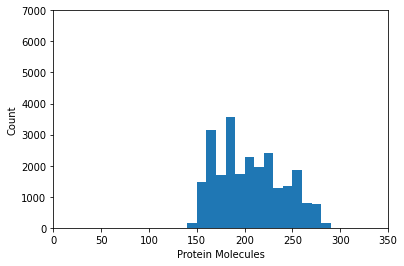

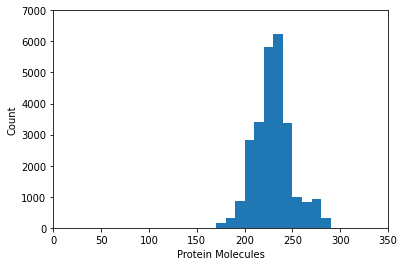

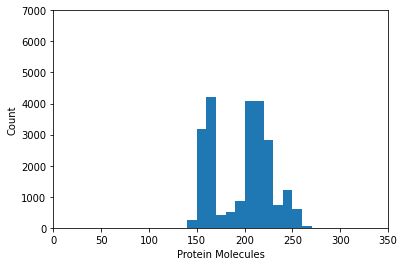

In [16]:
for samp in range(5):
    plt.hist(mol.T[7][np.logical_and(time>samp*4000, time<(samp+1)*4000)], bins  = np.arange(0,36)*10)
    plt.xlim(0,350)
    plt.ylim(0,7000)
    plt.xlabel('Protein Molecules')
    plt.ylabel('Count')
    plt.savefig(f'Hist {samp+1}.pdf')
    plt.show()

In [158]:
time[np.logical_and(time>2000, time<4000)]

array([2000.15770034, 2000.50919434, 2000.79109934, ..., 3999.54429235,
       3999.82654235, 3999.99390135])

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

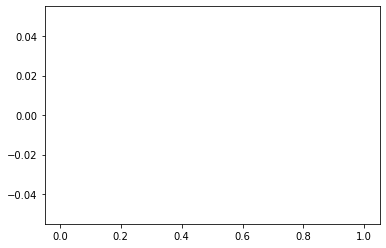

In [161]:
plt.hist(mol.T[7][np.logical_and(time>samp*4000, time<(samp+1)*4000)])

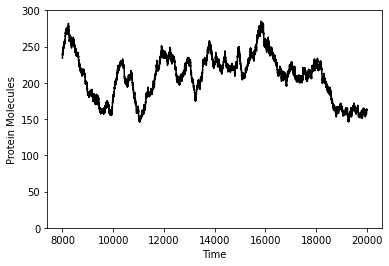

In [23]:
plt.plot(time[time>8000], mol.T[7][time>8000],'k')
#for samp in range(6):
   #plt.axvline(samp*4000,color = 'r')
plt.xlabel('Time')
plt.ylabel('Protein Molecules')
plt.ylim(0,300)
plt.savefig('steady_state_detection ss.pdf')

In [50]:
test_df = pd.read_csv('save')

In [51]:
time = np.cumsum(test_df[test_df.columns[0]]).values
mol = test_df[test_df.columns[1:-1]].values

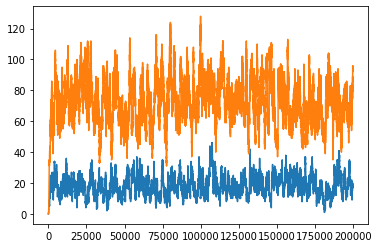

In [18]:
plt.plot(time, mol.T[7])
plt.plot(time, mol.T[3])

In [128]:
#df2 = pd.read_csv('GillespieSSA2.csv')
df3 = pd.read_csv('GillespieSSA2-2.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'GillespieSSA2-2.csv'

In [64]:
df2.values.T[2]

array([ 0.,  0.,  0., ..., 99., 99., 99.])

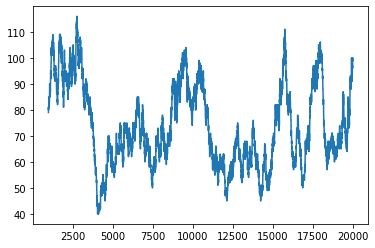

In [69]:
plt.plot(np.array(df2.values.T[1][1000:]), np.array(df2.values.T[2][1000:]))

In [66]:
df2

,Unnamed: 0,V1,V2,V3
0,1,0.000000,0,0
1,2,2.168740,0,0
2,3,2.364420,0,0
3,4,5.229708,0,0
4,5,5.522756,0,0
...,...,...,...,...
23742,23743,19994.738299,99,16
23743,23744,19995.866297,100,16
23744,23745,19997.967055,99,16
23745,23746,19999.319464,99,16


In [20]:
from scipy.stats import ttest_ind

In [112]:

ttest_ind(df2.values.T[3][1000:], mol.T[7][1000:])

Ttest_indResult(statistic=71.07743675880879, pvalue=0.0)

(array([  765.,  6488., 16626., 27989., 28802., 22497.,  9553.,  4480.,
         1988.,   308.]),
 array([ 34. ,  43.6,  53.2,  62.8,  72.4,  82. ,  91.6, 101.2, 110.8,
        120.4, 130. ]),
 <BarContainer object of 10 artists>)

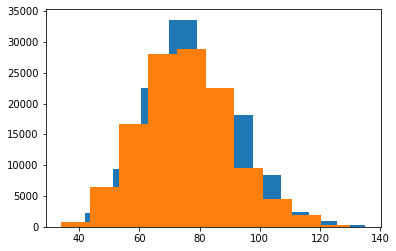

In [18]:
plt.hist(df2.values.T[2][1000:])
plt.hist(df3.values.T[2][1000:])

In [23]:
ttest_ind(df2.values.T[2][2000:], df3.values.T[2][2000:])

Ttest_indResult(statistic=51.22939396801394, pvalue=0.0)

In [22]:
ttest_ind(df2.values.T[3][2000:], mol.T[7][2000:])

Ttest_indResult(statistic=44.78693253480544, pvalue=0.0)

In [25]:
from scipy.stats import ks_2samp

In [121]:

ks_2samp(df2.values.T[3][2000:], mol.T[7][2000:])

KstestResult(statistic=0.11586598087299482, pvalue=0.0)

In [26]:
ks_2samp(df2.values.T[2][2000:], df3.values.T[2][2000:])

KstestResult(statistic=0.0784910649976269, pvalue=4.3776e-319)

In [25]:
ks_2samp(mol2.T[7][2000:], mol.T[7][2000:])

KstestResult(statistic=0.03157109664352997, pvalue=2.432431019161736e-102)

(array([ 10956.,  76471., 199516., 233491., 177498.,  83706.,  32330.,
          8343.,   2742.,   1144.]),
 array([ 0. ,  5.1, 10.2, 15.3, 20.4, 25.5, 30.6, 35.7, 40.8, 45.9, 51. ]),
 <BarContainer object of 10 artists>)

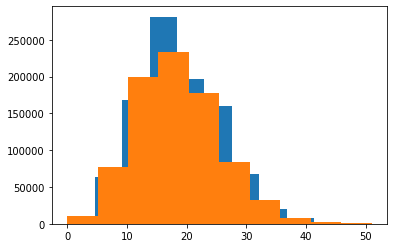

In [16]:
plt.hist(mol.T[7][2000:])
plt.hist(mol2.T[7][2000:])

In [37]:
len(df3.index)

23267

In [10]:
pd.read_csv('count.csv')

,0,1,1.1,1.2,3055,0.1,2,0.2,1011,Unnamed: 9
0,0.100758,2,0,1,3141,1,1,0,1047,NaN
1,0.010612,2,0,2,3141,1,1,0,1047,NaN
2,0.045556,2,0,2,3141,0,2,0,1047,NaN
3,0.073274,2,0,3,3141,0,2,0,1047,NaN
4,0.049819,2,0,2,3141,0,2,0,1047,NaN
...,...,...,...,...,...,...,...,...,...,...
11816,0.018746,2,0,3,3562,2,0,0,1205,NaN
11817,0.017365,2,0,3,3562,1,1,0,1205,NaN
11818,0.014486,1,1,3,3562,1,1,0,1205,NaN
11819,0.015363,1,1,3,3562,0,2,0,1205,NaN


In [4]:
'A:B'.split(':')[0]

'A'

In [3]:
import pandas as pd


In [18]:
pd.read_csv('data/toy_data/two_gene_cell_cycle_count_output.csv').filter(regex = '^'+'B')

,B:gene,B:mRNA,B:protein
0,2,0,2
1,2,0,2
2,2,0,1
3,2,1,1
4,2,1,2
...,...,...,...
65054,2,1,4
65055,2,1,5
65056,2,0,5
65057,2,0,4
